# Assignment 1

This exercise aims to familiarise you with LLM, Python and Kaggle.

The task is simple but the preamble is long. The rubrics are intrinsically the same for the rest of this semester.

## Submission

Only **one** person from the group needs to submit the file. List the whole group names on the cover page.

You must submit a **PDF** file to LMS.
Generating from Latex is preferred, but conversion from a Word file is fine.

Your assignment should satisfy the following formatting requirements:

- **$\leq 300$ words**. Tables and Figures and their associated title or note are not counted.
- Provide a **public link** to one and only one `Python` code file at the end of the PDF file. Anyone with the link should be able to access the file without authentication. Do not paste your code into the PDF file.
If you have multiple code files, link to the folder and add a *readme* file to explain their usage.
- Any data must be stored online and accessible via the code file.
- Submission will be checked via **Turnitin**.

You will receive a **ZERO** mark if
  - there is no valid code link, or
  - there is actual code in the PDF file, or
  - the data cannot be accessed from the source code, or
  - you use any code other than `Python`, or
  - your results cannot be replicated by your code, or.
  - Turnitin indicates more than 80% similarity or at your marker's discretion.



## Writing Guidance

Writing is essential not only to this subject and your course but also for your future career. Here are some tips

- Consider grammar-checking apps such as [Grammarly](https://www.grammarly.com/). The free edition usually suffices.
- Never paste your output to your file as a table. Compile your tables properly.
- Do not paste screenshots of figures. They can be exported properly and easily.
- ChatGPT is helpful, but it has a writing style we hate. Be careful.

Some **rubrics** to guide your writing.
1. [**Logic**]
  - Sentences and paragraphs must be coherent.
  - Any statement must be logical with common econometric and statistical sense.
  - Demonstrate that you understand the algorithm if applicable.

2. [**Formality**]
  - There are not many grammar mistakes, including typos.
  - Each paragraph has one clear message.
  - Avoid overlong sentences.
  - Clear title and section names.
  - Clear figures and tables. Label them properly and provide enough descriptions. In principle, a figure or a table should be self-contained.
  - Do not paste code.

3. [**Curiosity**]
  - Use a research spirit on your assignment. It would be great if you could discover something new.
  - Try to link the application to some common senses.
  - Ask your own questions and answer them.

4. [**Technique**]
  - Your file should have a public accessible link to your code.
  - Your results can be replicated with the above file. This means your data should be online and accessible via your code file.
  - Your code should have enough comments for your marker to understand.
  - Your code should look friendly with variable names that are easy to interpret.
  - Nice coding tricks are always welcome.
  - Show that you understand the pros and cons of certain methods.

## Feedback

Because of this subject's open-end nature,
**no solution** will be provided.
Instead, best performing group will be selected to discuss their results.

Each group will receive brief and personalised written feedback.
You are welcome to discuss
more details with us
in person for learning purposes.



## No Mark Negotiation

Decisions based on academic judgement cannot be appealed and are not subject to complaint.
For more details, see [university policy](https://ask.unimelb.edu.au/faq/2910/).

The only exception is procedural matters.

## AI check

If your assignment is considered written by AI with (1) obviously poor logic and (2) wrong methodologies, your group will be subject to an **interview**. Failing to show up the interview will result in a **zero** mark.

# Task

Use the ADA [competition case](https://www.kaggle.com/competitions/ecom-90025-2025-sm-2-ada-assignment-and-practice/overview) or [here](https://www.kaggle.com/t/f5f7783abf31495f9593b3d93a18f9eb) if the first fails.

1. Read the training sample to a Pandas dataframe.
1. Report the correlations of explanatory variables with the dependent variable $y$.
1. Choose one explanatory variable, denoted by $x$, and estimate a simple linear model
$$y=\beta_0+\beta_1x + \epsilon$$
1. Use the estimtes of $\beta_0$ and $\beta_1$ and the testing sample to predict $y$.
1. Submit your prediction file and get your Kaggle score screenshot.
1. Show your screenshot in the PDF file. Circle your **group name** in the screenshot.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Reading the training sample to a Pandas dataframe

In [50]:
df = pd.read_csv(r'c:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Data\train_data.csv')
df

,ID,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,0,-1.399091,1.174139,1.413109,0.164693,-1.067338,0.015324,-1.280970,0.489681,-0.371982,...,-0.115044,-2.580043,-0.812428,0.772820,-0.460444,0.190422,-0.362052,-1.119038,0.916313,-1.517434
1,1,3.097990,0.208922,0.931231,0.838779,0.893483,-0.510555,0.900289,-0.042490,0.839400,...,1.155635,0.673035,-0.438152,-0.001316,-0.761800,1.335092,0.901978,-1.549504,-0.456224,0.223405
2,2,-1.707346,-0.744982,0.962118,0.615392,-0.427943,-0.014912,1.138781,1.159491,0.055467,...,0.299277,1.387495,-0.007519,-0.464825,0.830986,0.373124,0.319232,-0.577295,-1.363846,-0.347154
3,3,0.610625,-0.170428,-1.361771,0.206042,0.623124,0.907441,-0.873814,1.287383,0.901191,...,1.209247,0.095866,-0.287905,-1.110714,-1.660352,0.207231,-0.419119,-0.517563,-1.050697,-0.096327
4,4,-0.689196,-0.858792,0.321308,-0.415649,1.014056,-0.522858,0.926634,-0.390663,0.790054,...,-1.191989,-1.127448,0.246358,0.407769,1.132454,-0.016621,0.964745,0.091532,0.649593,-0.818020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,-5.063792,-1.500594,2.262106,-1.286958,-0.398137,-0.019257,-1.859877,0.196154,-0.123364,...,-0.238003,0.943160,1.689948,0.266216,-0.502425,1.375605,0.078639,1.164708,0.086458,0.047496
2396,2396,-3.573210,0.948172,0.808575,-0.009122,-0.276098,-1.229387,-0.986770,-0.504906,0.815537,...,-0.601955,1.157294,1.288724,-0.122133,0.615786,-0.106246,-0.253334,0.055553,-1.169629,1.321333
2397,2397,4.387664,-2.057319,0.339223,0.867412,-0.141428,0.808745,0.501565,0.253387,-0.627412,...,-1.616346,-0.859179,0.283684,0.232211,-0.459273,3.340270,-0.714544,-0.789180,-0.844288,1.042886
2398,2398,4.478714,0.561107,0.425766,-0.512064,-2.088253,-0.512058,0.286206,-0.245990,0.132967,...,-0.321989,-0.072009,0.886691,1.181095,-1.336608,-1.428349,-0.781647,1.364690,-1.627872,-0.038954


Reporting the correlations of explanatory variables with the dependent variable $y$

In [56]:
corr = df.corr(method='pearson')['Y'].drop(['Y', 'ID'])
corr_df = pd.DataFrame({'ID': corr.index, 'Correlation': corr.values})
corr_df.head(10)

,ID,Correlation
0,X1,0.135257
1,X2,0.010244
2,X3,0.034430
3,X4,0.007688
4,X5,0.110160
5,X6,0.008458
6,X7,0.014777
7,X8,0.002121
8,X9,-0.022106
9,X10,0.141671


For this exercise, let us choose the variable with the largest positive correlation.

In [57]:
corr_df.loc[corr_df.Correlation == max(corr_df.Correlation)]

,ID,Correlation
33,X34,0.330143


Let us now estimate a simple linear regression model and print out our results.

In [ ]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print('Coefficients:', coefficients)
print('Intercept:', intercept)

0       0.549597
1      -1.350385
2       1.131879
3      -0.801736
4      -0.528211
          ...   
2395   -1.523590
2396   -1.808961
2397   -0.235459
2398    2.037611
2399    1.178921
Name: X34, Length: 2400, dtype: float64

In [70]:
# Estimate a simple linear regression model

X = df[['X34']]
y = df[['Y']]
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [[1.1650472]]
Intercept: [0.43622054]


Import the testing sample to see how the model performs.

In [73]:
test_df = pd.read_csv(r'c:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Data\test_data.csv')
test_df

# Predict Y using X34 in the test set

X_34 = test_df[['X34']]
Y_pred = model.predict(X_34)

# Create the dataframe with each ID and the predicted Y value

test_df['Y_pred'] = Y_pred
pred_df = test_df[['ID', 'Y_pred']]
pred_df

,ID,Y_pred
0,2400,0.816814
1,2401,1.255178
2,2402,0.455569
3,2403,-1.719227
4,2404,1.828901
...,...,...
1595,3995,2.770799
1596,3996,0.614231
1597,3997,0.981965
1598,3998,1.086963


Exporting the prediction to a csv file for submission

In [75]:
submission_ass1 = pd.read_csv(r'c:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Data\submission.csv')
submission_ass1['Y'] = pred_df[['Y_pred']].values
export_path = r'C:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Assignments\A1_submission.csv'
submission_ass1.to_csv(export_path, index=False)

Screenshot of final submission for assignment 1 to Kaggle

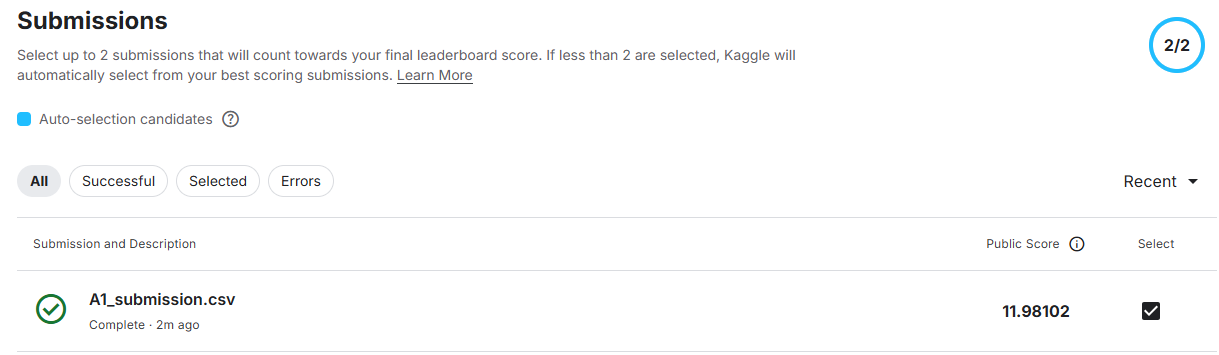